In [10]:
import torch
import torchsummary # 모델 구조 보기좋게 출력
import torchvision
from torchvision import models
from torchvision import utils
from torchvision.utils import *

import numpy as np
from pathlib import Path

In [11]:
# device 세팅

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [12]:
size = [64, 64]

In [13]:
# 모델 로드 및 출력
"""
torchvision.models 에서 여러 모델 로드 가능
pretrained weight도 다운 가능
"""
pretrained_weight = models.ResNet50_Weights.IMAGENET1K_V2
model = models.resnet50(weights = pretrained_weight).to(device)
torchsummary.summary(model, (3, size[0], size[1]))

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 10.00 GiB total capacity; 9.29 GiB already allocated; 0 bytes free; 9.29 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [5]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [462]:
transform = torchvision.transforms.Compose([
#     torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(size),
])
imageNetDataSet1 = torchvision.datasets.ImageNet(test_path, split = "val", transform = transform)

In [463]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(size),
    torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
imageNetDataSet2 = torchvision.datasets.ImageNet(test_path, split = "val", transform = transform)

In [464]:
idx = 202

4


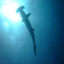

In [465]:
print(imageNetDataSet1[idx][1])
imageNetDataSet1[idx][0]

In [466]:
# 전처리
image = imageNetDataSet2[idx][0].to(device)
print(image.shape)
image = image[np.newaxis, :, :, :]
print(image.shape)
# print(image.shape)
# image = (image/255-1)

torch.Size([3, 64, 64])
torch.Size([1, 3, 64, 64])


In [467]:
result = model(image)

In [468]:
torch.argmax(result)

tensor(134, device='cuda:0')

In [ ]:
lr = 0.0001
num_epochs = 5
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss().to(device)

In [495]:
import os
import pathlib
from torchvision import transforms
from torch.utils.data import DataLoader

pathlib.Path('./train').mkdir(parents = True, exist_ok=True)
pathlib.Path('./test').mkdir(parents = True, exist_ok=True)

train_dataset = torchvision.datasets.STL10('/train', split='train', download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.STL10('/test', split='test', download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [496]:
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [503]:
for x in train_dataloader:
    print(x[1])

tensor([6, 5, 4, 7, 6, 4, 9, 1, 1, 8, 0, 6, 9, 5, 2, 8, 1, 3, 9, 8, 1, 0, 6, 0,
        4, 5, 1, 9, 0, 9, 1, 1, 6, 2, 1, 9, 1, 8, 2, 4, 6, 6, 9, 5, 7, 4, 2, 9,
        3, 2, 8, 9, 7, 2, 0, 1, 4, 7, 1, 2, 0, 2, 6, 0, 3, 0, 5, 5, 5, 5, 2, 3,
        7, 0, 3, 1, 7, 7, 4, 5, 9, 3, 4, 9, 8, 6, 1, 7, 4, 7, 0, 5, 1, 1, 1, 2,
        8, 7, 0, 5, 8, 8, 9, 6, 0, 3, 2, 1, 8, 5, 5, 5, 1, 9, 5, 5, 9, 3, 4, 8,
        8, 7, 4, 0, 3, 3, 0, 0])
tensor([8, 1, 2, 8, 3, 1, 5, 5, 8, 0, 0, 9, 2, 5, 1, 3, 4, 6, 2, 1, 9, 5, 8, 3,
        5, 2, 0, 8, 7, 1, 2, 0, 0, 1, 4, 8, 7, 5, 1, 3, 3, 8, 5, 9, 2, 1, 5, 6,
        0, 8, 1, 0, 0, 0, 7, 3, 0, 0, 1, 0, 7, 3, 7, 7, 6, 5, 7, 8, 2, 1, 1, 4,
        9, 4, 2, 2, 6, 8, 4, 9, 6, 6, 5, 0, 7, 9, 2, 3, 5, 2, 9, 5, 9, 6, 4, 2,
        7, 0, 5, 6, 6, 4, 9, 2, 3, 0, 3, 3, 2, 2, 4, 2, 7, 3, 9, 9, 0, 0, 2, 1,
        8, 3, 0, 1, 4, 7, 7, 9])
tensor([8, 3, 7, 9, 2, 2, 8, 8, 2, 9, 7, 2, 2, 5, 1, 6, 0, 4, 8, 6, 6, 1, 6, 4,
        3, 0, 2, 5, 9, 3, 5, 7, 9, 4, 2, 7, 9, 9, 4, 5

tensor([4, 7, 1, 7, 9, 4, 5, 1, 9, 3, 2, 1, 0, 0, 8, 3, 1, 3, 9, 4, 6, 1, 8, 9,
        7, 9, 1, 2, 4, 5, 4, 0, 8, 7, 6, 6, 9, 8, 2, 4, 1, 7, 6, 6, 9, 1, 5, 6,
        9, 3, 1, 8, 3, 3, 7, 3, 9, 6, 1, 6, 8, 1, 6, 7, 7, 7, 1, 1, 9, 7, 9, 1,
        3, 0, 9, 6, 6, 2, 1, 5, 6, 4, 5, 9, 3, 9, 4, 4, 0, 6, 1, 1, 4, 8, 6, 1,
        9, 4, 1, 4, 2, 2, 8, 2, 1, 2, 2, 3, 4, 1, 2, 9, 2, 5, 8, 8, 3, 8, 3, 2,
        2, 1, 8, 3, 7, 5, 0, 6])
tensor([5, 7, 5, 7, 9, 3, 8, 2, 5, 1, 9, 3, 5, 6, 0, 6, 8, 4, 4, 3, 9, 9, 9, 3,
        5, 0, 3, 3, 6, 8, 3, 7, 8, 0, 4, 7, 5, 8, 4, 1, 5, 5, 6, 5, 5, 4, 2, 3,
        7, 0, 3, 4, 3, 6, 5, 9, 3, 7, 4, 7, 2, 8, 9, 8, 8, 9, 0, 9, 9, 2, 8, 2,
        3, 3, 2, 6, 7, 6, 0, 2, 4, 6, 6, 2, 7, 6, 7, 6, 7, 9, 8, 8, 0, 5, 2, 1,
        2, 0, 7, 0, 1, 7, 8, 5, 8, 7, 3, 1, 4, 0, 7, 3, 6, 4, 7, 6, 2, 1, 9, 2,
        8, 9, 6, 3, 0, 4, 8, 5])
tensor([8, 1, 9, 4, 3, 9, 6, 7, 4, 8, 0, 2, 4, 1, 0, 3, 1, 1, 7, 0, 5, 3, 2, 2,
        9, 2, 7, 2, 5, 8, 3, 9, 4, 8, 6, 6, 8, 5, 6, 8

In [483]:
len(test_dataset)

8000

In [485]:
import torch
import torch.nn as nn
from torch import optim

In [505]:
lr = 0.0001
num_epochs = 5
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss().to(device)

In [506]:
params = {
    'num_epochs':num_epochs,
    'optimizer':optimizer,
    'loss_function':loss_function,
    'train_dataloader':train_dataloader,
    'test_dataloader': test_dataloader,
    'device':device
}

In [508]:
def train(model, params):
    loss_function=params["loss_function"]
    train_dataloader=params["train_dataloader"]
    test_dataloader=params["test_dataloader"]
    device=params["device"]

    for epoch in range(0, num_epochs):
        for i, data in enumerate(train_dataloader, 0):
            # train dataloader 로 불러온 데이터에서 이미지와 라벨을 분리
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 이전 batch에서 계산된 가중치를 초기화
            optimizer.zero_grad() 

            # forward + back propagation 연산
            outputs = model(inputs)
            train_loss = loss_function(outputs, labels)
            train_loss.backward()
            optimizer.step()

        # test accuracy 계산
        total = 0
        correct = 0
        accuracy = []
        
        for i, data in enumerate(test_dataloader, 0):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 결과값 연산
            outputs = model(inputs)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_loss = loss_function(outputs, labels).item()
            accuracy.append(100 * correct/total)

        # 학습 결과 출력
        print('Epoch: %d/%d, Train loss: %.6f, Test loss: %.6f, Accuracy: %.2f' %(epoch+1, num_epochs, train_loss.item(), test_loss, 100*correct/total))

In [509]:
train(model, params)

Epoch: 1/5, Train loss: 5.848760, Test loss: 5.452781, Accuracy: 17.93
Epoch: 2/5, Train loss: 1.558341, Test loss: 0.827494, Accuracy: 69.75
Epoch: 3/5, Train loss: 0.355515, Test loss: 0.433969, Accuracy: 83.19
Epoch: 4/5, Train loss: 0.563165, Test loss: 0.397528, Accuracy: 84.99
Epoch: 5/5, Train loss: 0.867846, Test loss: 0.428585, Accuracy: 85.62


In [ ]:
model[]